In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
# plt.style.use(['science', "no-latex"])

In [2]:
def plot_scatter_dmp(x, y, save_path):
    l1 = np.mean(np.abs(x-y))
    plt.figure(figsize=(4,4))
    plt.scatter(x, y, c="tomato",s=10, marker=".", alpha=0.8, edgecolors="tomato")
    plt.plot([0,1], "k-.")
    plt.axis("off")
    # if args.data_name == 'tree':
    #     plt.title("L1 error = {:.4f}".format(l1),fontsize = 28,fontweight ='bold')
    # else:
    #     plt.title("{:.4f}".format(l1),fontsize = 28)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300,bbox_inches='tight')

def plot_scatter(x, y, save_path):
    l1 = np.mean(np.abs(x-y))
    plt.figure(figsize=(4,4))
    plt.scatter(x, y, c="tomato",s=10, marker=".", alpha=0.8, edgecolors="tomato")
    plt.plot([0,1], "k-.")
    plt.axis("off")
    # plt.title("{:.4f}".format(l1),fontsize = 28)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300,bbox_inches='tight')

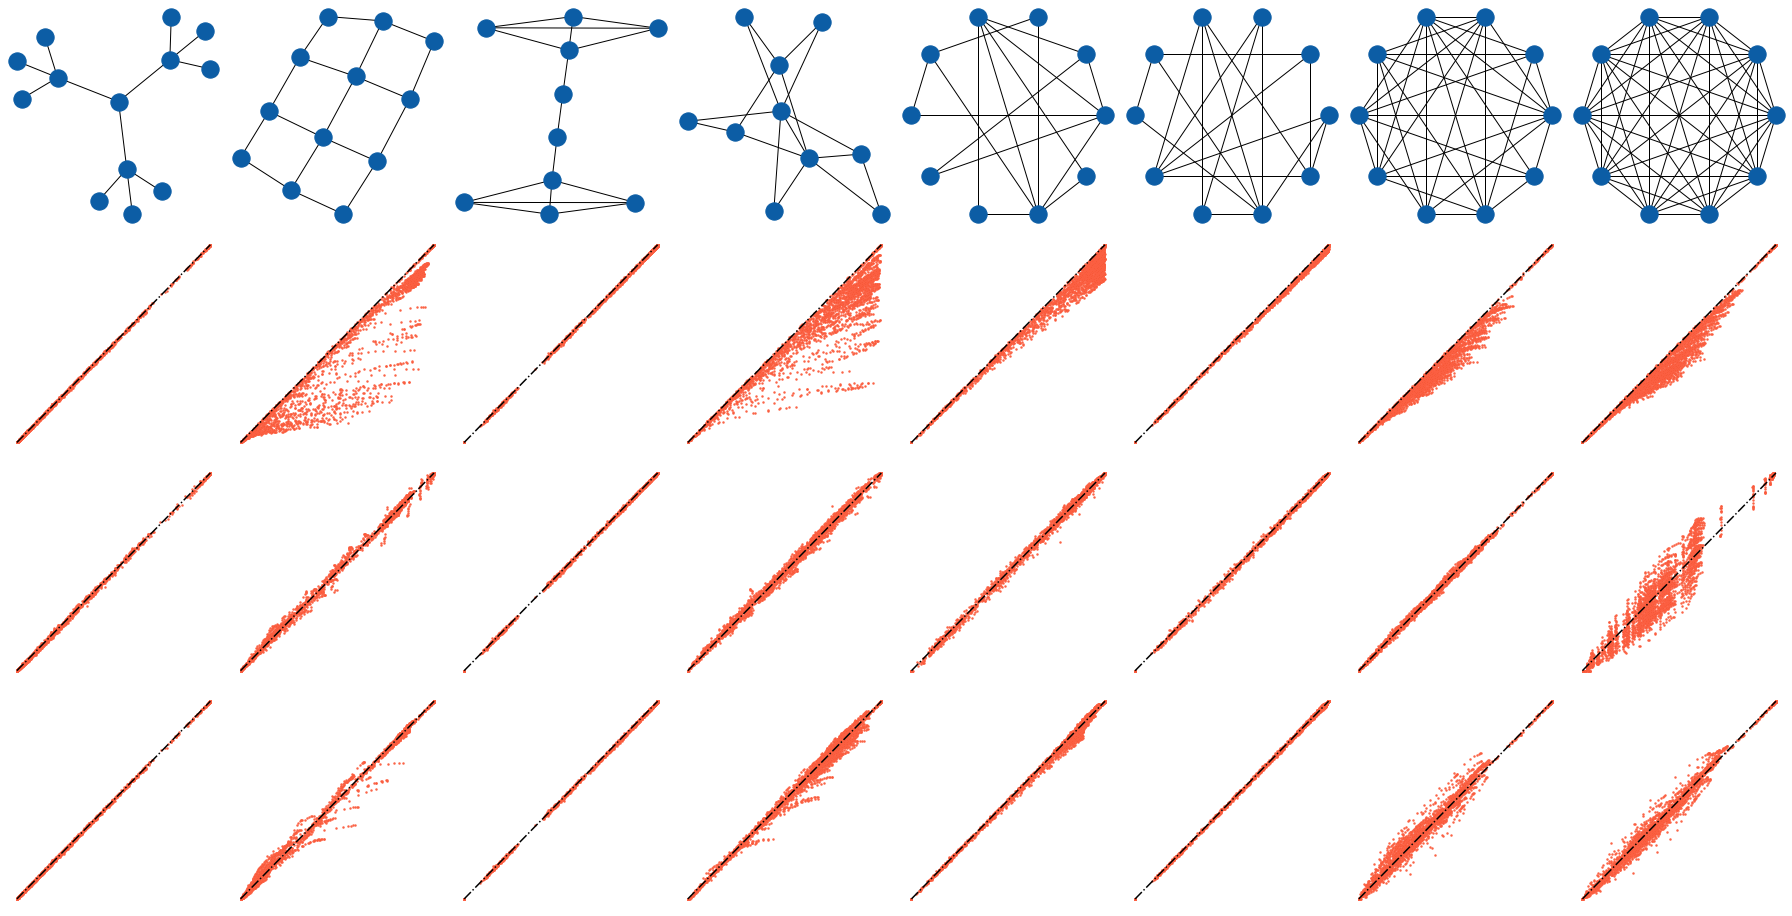

In [20]:
# fig, axs = plt.subplots(5,8,figsize=(15,6)) #把绘图区域分成2排5列
plt.figure(figsize=(25,16))
data_name = ['tree','barbell','complete','er03','er05','er08','grid','regular_graph']
model = ['gnn', 'nedmp']

for ind1 in range(5):
    for ind2 in range(8):
        if ind1 == 0:
            g = [nx.balanced_tree(r=3, h=2),nx.grid_2d_graph(3,4),nx.barbell_graph(4,2),
                 nx.random_graphs.barabasi_albert_graph(10,2),nx.random_graphs.erdos_renyi_graph(10,0.3),
                 nx.random_graphs.erdos_renyi_graph(10,0.5) ,nx.random_graphs.erdos_renyi_graph(10,0.8) ,
                 nx.complete_graph(10)]
            ax = plt.subplot(5,8,ind1*5+ind2+1)
            if ind2 > 3:
                pos = nx.circular_layout(g[ind2])
                nx.draw(g[ind2],pos, with_labels=False, ax=ax, node_color='#0C5DA5')
            else:
                nx.draw(g[ind2], with_labels=False, ax=ax, node_color='#0C5DA5') 
                
        if ind1 == 1:
            ax = plt.subplot(5,8,ind1*8+ind2+1)
            load_path = "../data/synthetic/{}/train_data/{}_100.pkl_{}_{}_testResults.pkl".format(data_name[ind2], "SIR", model[0], "SIR")
            
            with open(load_path, "rb") as f:
                data = pkl.load(f)
            test_predict, test_label, dmp_predict = data.values()

            true_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in test_label])
            dmp_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in dmp_predict])
            
            ax.scatter(dmp_value, true_value, c="#e8461a",s=10, marker=".", alpha=0.8, edgecolors="tomato")
            plt.plot([0,1], "k-.")
            plt.axis("off")
      
            plt.tight_layout()
        
        if ind1 == 2:
            ax = plt.subplot(5,8,ind1*8+ind2+1)
            load_path = "../data/synthetic/{}/train_data/{}_100.pkl_{}_{}_testResults.pkl".format(data_name[ind2], "SIR", model[0], "SIR")
            
            with open(load_path, "rb") as f:
                data = pkl.load(f)
            test_predict, test_label, dmp_predict = data.values()

            true_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in test_label])
            model_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in test_predict])
            dmp_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in dmp_predict])
            
            ax.scatter(model_value, true_value, c="#e8461a",s=10, marker=".", alpha=0.8, edgecolors="tomato")
            plt.plot([0,1], "k-.")
            plt.axis("off")
      
            plt.tight_layout()
        
        
        if ind1 == 3:
            ax = plt.subplot(5,8,ind1*8+ind2+1)
            load_path = "../data/synthetic/{}/train_data/{}_100.pkl_{}_{}_testResults.pkl".format(data_name[ind2], "SIR", model[1], "SIR")
            
            with open(load_path, "rb") as f:
                data = pkl.load(f)
            test_predict, test_label, dmp_predict = data.values()

            true_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in test_label])
            model_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in test_predict])
            dmp_value = np.hstack([x[:, :, -1].reshape(-1, 1).squeeze() for x in dmp_predict])
            
            ax.scatter(model_value, true_value, c="#e8461a",s=10, marker=".", alpha=0.8, edgecolors="tomato")
            plt.plot([0,1], "k-.")
            plt.axis("off")
      
            plt.tight_layout()
        
plt.savefig('syn_SIR.pdf',bbox_inches = 'tight')
plt.show()
